# Exercise 04: Hyperparameter Tuning Part 4: Automated Tuning

**Make sure you've completed Exercises 01-03 before attempting this exercise!**

In this exercise,
you will explore techniques for automatically assessing hyperparameter settings.

As usual, let's install packages and import modules:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve

Once again we will use the model function and pipeline from Exercise 01:

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

pipeline = Pipeline([
    ("poly",   PolynomialFeatures(include_bias=False)),
    ("linreg", LinearRegression()),
])

The following code
generates the same samples
that we used in Exercise 01.

It then plots results for various combinations
of scoring technique
and number of cross-validation sets.

Don't get too bogged down
in the details of the scoring;
all you really need to know
is that higher is better.

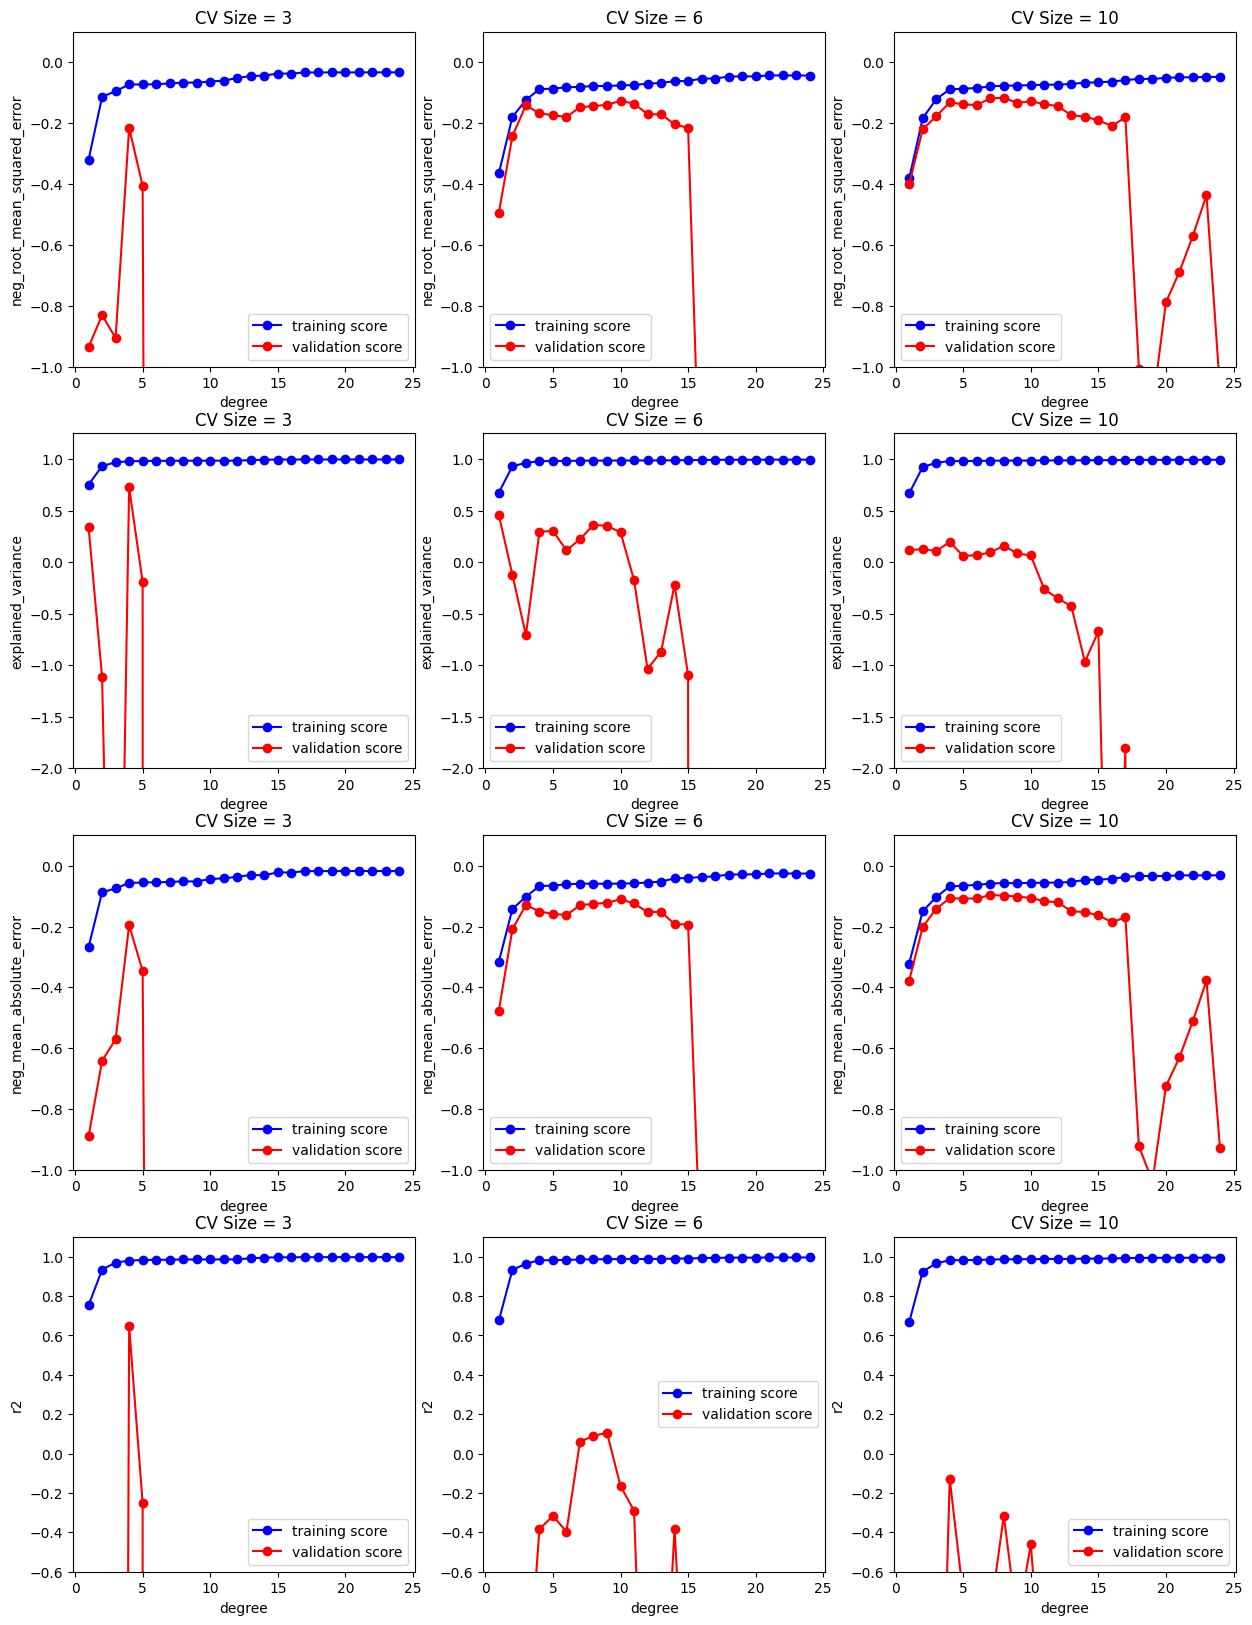

In [4]:

np.random.seed(3)

N_samples = 30
degrees = np.arange(0,25)

X_samples = np.sort(np.random.rand(N_samples))
y_samples = true_fun(X_samples) + np.random.randn(N_samples) * 0.1

cv_sizes = [3, 6, 10]
scoring_infos = [
    ['neg_root_mean_squared_error', [ -1.0, 0.10]],
    ['explained_variance',          [ -2.0, 1.25]],
    ['neg_mean_absolute_error',     [ -1.0, 0.10]],
    ['r2',                          [ -0.6, 1.10]],
]

N_cols = len(cv_sizes)
N_rows = len(scoring_infos)

plt.figure(figsize=(5*N_cols, 5*N_rows))

for row_idx in range(N_rows):
    for col_idx in range(N_cols):
            ax = plt.subplot(N_rows, N_cols, 1 + row_idx*N_cols + col_idx)

            train_score, val_score = validation_curve(
                pipeline,
                X_samples[:,np.newaxis],
                y_samples,
                param_name='poly__degree',
                param_range=degrees,
                cv=cv_sizes[col_idx],
                scoring=scoring_infos[row_idx][0],
            )

            plt.plot(degrees, np.median(train_score, 1), marker='o', color='blue', label='training score')
            plt.plot(degrees, np.median(val_score, 1),   marker='o', color='red',  label='validation score')

            plt.legend(loc='best')
            plt.ylim(scoring_infos[row_idx][1][0], scoring_infos[row_idx][1][1])
            plt.xlabel('degree')
            plt.ylabel(scoring_infos[row_idx][0]);
            plt.title('CV Size = {}'.format(cv_sizes[col_idx]))


**Why does the training score tend to rise and then level out?**

As the degree of the polynomial increases, the better it fits the training data.

**Why does the validation score tend to rise, level off, and then fall?**

The training data isn't fitting in the beginning but starts to fit when we're dealing with lower degree polynomials but as we get into higher degree polynomials, the data is fit too perfectly to the point where new data can't be handled which is why the validation score falls.

**Based on the above plots, which polynomial degree(s) best models the data?  Justify your claim.**

The polynomial degrees that best models the data is 4 and maybe 5. They're consistent throughout each plot.

**Based on the plots above, does cross-validation set size have a significant affect on hyperparameter tuning?**

No, cross-validation set size does not have a significant affect on hyperparameter.

**Based on the plots above, does the scoring metric have a significant affect on hyperparameter tuning?**

Yes, the scoring metric has an affect on hyperparameter tuning.

**The code for Exercises 01 and 02 contains a classic ML blunder (which you definitely noticed, right!?!).  What is it?**

YOUR ANSWER HERE.

**What did you think of this week's exercises?**

YOUR ANSWER HERE.

In [ ]:
A little challenging but I learned more about variance and bias